# Netflix Analysis using Movies Dataset from Kaggle

In [1]:
# Import libraries
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import data
file = "netflix_titles.csv"
data = pd.read_csv(file)

# Since column names are rare, we rename columns
rename_data = data.rename(columns={"show_id": "Show ID", "type": "Type", "title": "Title", "director": "Director",
                            "cast": "Cast", "country": "Country", "date_added": "Date Added", "release_year": "Release Year",
                            "rating": "Rating", "duration": "Duration", "listed_in": "Genre", "description": "Description"})

In [4]:
# There is missing some information so we delete these data
clean_data = rename_data.replace(np.NaN)

In [5]:
# We separate the Movies data and visualize the information
movies_country = clean_data[clean_data["Type"] == 'Movie']
movies_country

,Show ID,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Genre,Description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,"Richard Finn, Tim Maltby",Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,"Jun Fukuyama, Shintaro Asanuma, Haruka Shirais...",United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...


In [6]:
# We visualize that the total of all data set is 6234 and after selecting the movies, we have 4265
print('Length of Total Dataset: ' + str(len(clean_data)))
print('Length of TV Shows Dataset: ' + str(len(movies_country)))

Length of Total Dataset: 6234
Length of TV Shows Dataset: 4265


In [7]:
# We count the number of movies per genre and save all the genres we found in our dataset
genre_list_movie = [] # Movies
genre_count_movie = {} # Movies counting

for listed in movies_country['Genre']:
    split_gen = [x.strip() for x in listed.split(',')] # Split in list where there is more than one value
    #print(split_genres)
    
    # Counting dictionary
    for i in range(len(split_gen)): 
        # Check if exists in genre_list or not and add it
        if split_gen[i] not in genre_list_movie: 
            genre_list_movie.append(split_gen[i]) 
        # Counting    
        if split_gen[i] in genre_count_movie:
            genre_count_movie[split_gen[i]] = genre_count_movie[split_gen[i]] + 1
        else:
            genre_count_movie[split_gen[i]] = 1

<IPython.core.display.Javascript object>


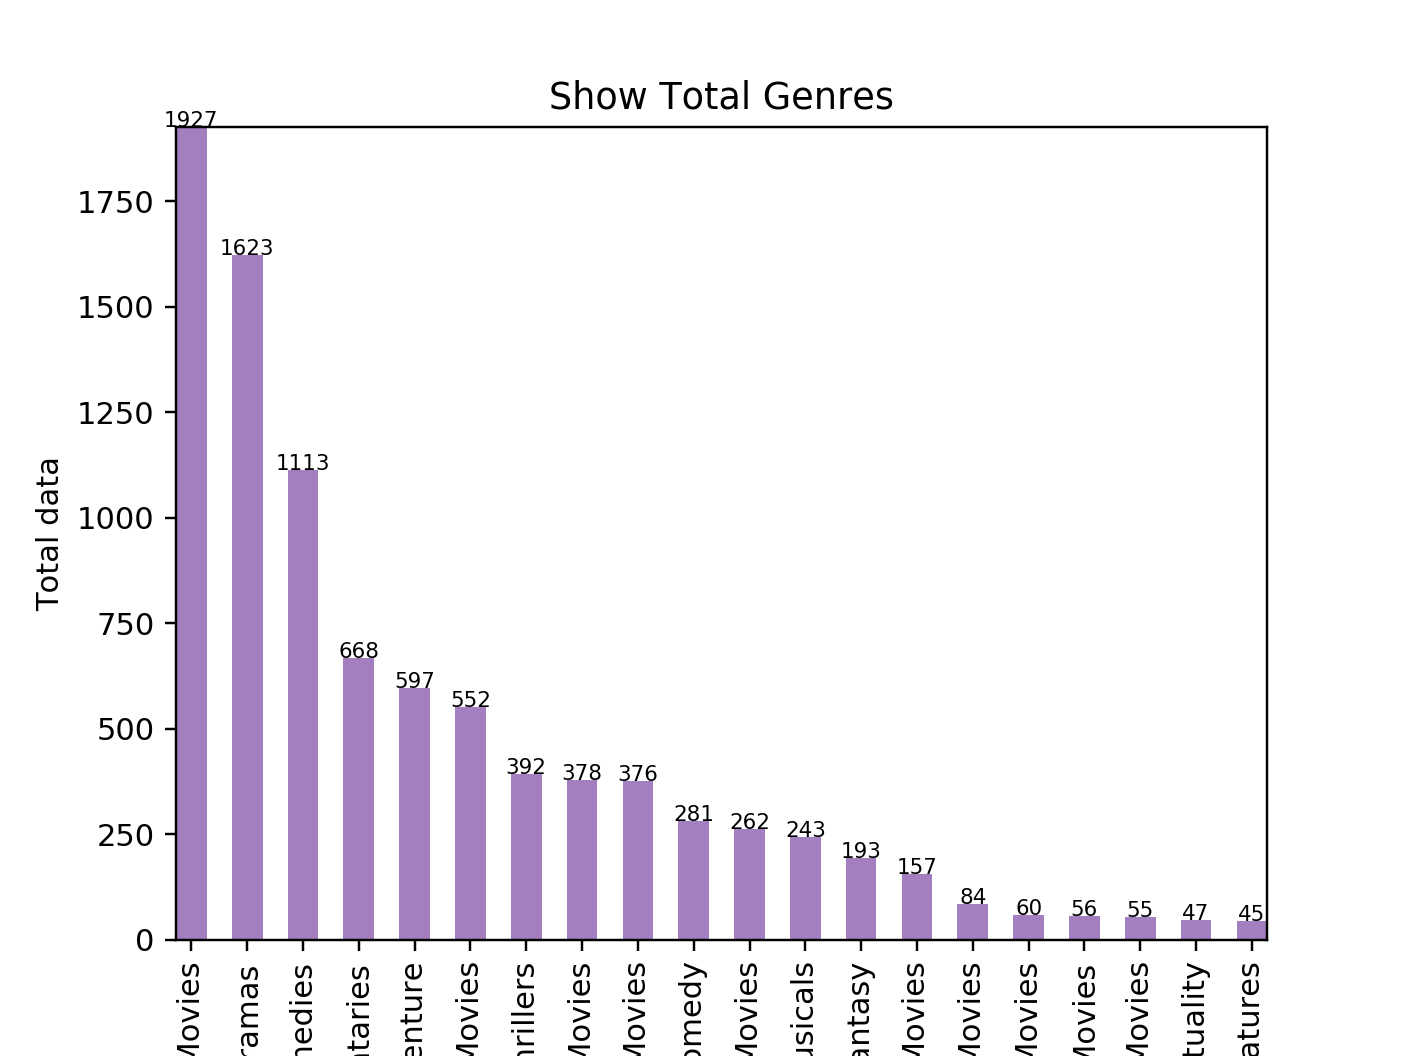

In [9]:
# Ploting the total counts
# Save to dataframe
df_genres_movies = pd.DataFrame.from_dict(genre_count_movie, orient='index', columns=['Total Data'])
# Sort values
sorted_genres_movie = df_genres_movies.sort_values(by=['Total Data'], ascending=False)
sorted_genres_movie.head(10)
# Bar plot
x_genres_movies = np.arange(len(sorted_genres_movie['Total Data']))
tick_gmlocations = [value for value in x_genres_movies]
width = 0.55
#plt.figure(figsize=(20,10))
plt.bar(x_genres_movies, sorted_genres_movie['Total Data'], width=width, color='indigo', alpha=0.5) 
plt.xticks(tick_gmlocations, sorted_genres_movie.index, rotation="vertical")
plt.autoscale(tight=True)
plt.xlabel("Genres")
plt.ylabel("Total data")
plt.title("Show Total Genres")

for i, v in enumerate(sorted_genres_movie['Total Data']):
    plt.text(i, v, str(v), color='k', ha='center', fontsize=7)
    
plt.savefig("TotalGenresMovie.png")

In [10]:
# Now we count the number of movies per country and extract the countries we have in the Netflix library
country_list_movie = [] # Countries
country_count_movie = {} # Count movies per each country

for listed_in in movies_country['Country']:
    split_country = [x.strip() for x in listed_in.split(',')] # Split in list if there are more than one collaboration
  
    # Save data
    for j in range(len(split_country)): 
        # Check if exists in country_list or not and add it
        if split_country[j] not in country_list_movie: 
            country_list_movie.append(split_country[j]) 
        # Count genres per country
        if split_country[j] in country_count_movie:
            country_count_movie[split_country[j]] = country_count_movie[split_country[j]] + 1
        else:
            country_count_movie[split_country[j]] = 1

In [11]:
# Now that we have the total of movies per genre and how many movies per country there are,
# we analyze the genres per country using a matrix where columns are genre list and rows are the countries
matrizMov = np.zeros((len(country_list_movie),len(genre_list_movie)))
# Save values of countries and genres
ctemp = movies_country['Country'].values
gtemp = movies_country['Genre'].values

for i in range(len(ctemp)): # We are in a row
    #print(i)
    cstmp=ctemp[i].split(',') # Separate the data if there is more than one country
    #print(cstmp)
    for k in range(len(cstmp)): # We jump to the next cell where there are the genres and separate them
        gctmp=gtemp[i].split(',') # Analyzing each country of the previous split, we are still in the same row
        #print(gctmp)
        for j in range(len(gctmp)): # Here, we are going to move through each genre for one country
            # We use the matrix as a xy coordinate system where x would be the index of countries, and y would be the columns of genre.
            # To get the index of each value, we use the list information of countries and genres and the function .index to look for the respective country and genre
            # We sum +1 when we get the xy coordinates
            try:
                matrizMov[country_list_movie.index(cstmp[k].strip()),genre_list_movie.index(gctmp[j].strip())]=matrizMov[country_list_movie.index(cstmp[k].strip()),genre_list_movie.index(gctmp[j].strip())]+1
            except:
                print('Error') # Just to verify that we gather all the data

In [12]:
# We convert the matrix information to a dataframe
df_movies = pd.DataFrame(data=matrizMov, index=country_list_movie, columns=genre_list_movie)
df_movies

,Children & Family Movies,Comedies,Stand-Up Comedy,International Movies,Sci-Fi & Fantasy,Thrillers,Action & Adventure,Dramas,Cult Movies,Independent Movies,Romantic Movies,Documentaries,Horror Movies,Music & Musicals,Anime Features,Faith & Spirituality,LGBTQ Movies,Movies,Classic Movies,Sports Movies
United States,283.0,460.0,203.0,137.0,135.0,205.0,249.0,546.0,37.0,289.0,134.0,418.0,146.0,85.0,4.0,30.0,39.0,37.0,61.0,88.0
India,20.0,254.0,2.0,736.0,11.0,75.0,128.0,546.0,4.0,129.0,92.0,38.0,33.0,98.0,0.0,4.0,2.0,3.0,12.0,16.0
South Korea,5.0,10.0,3.0,36.0,4.0,11.0,15.0,24.0,1.0,2.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
China,10.0,24.0,1.0,60.0,11.0,4.0,47.0,26.0,1.0,1.0,9.0,6.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
United Kingdom,32.0,70.0,19.0,131.0,28.0,43.0,59.0,125.0,5.0,53.0,23.0,112.0,22.0,25.0,0.0,5.0,4.0,4.0,11.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kazakhstan,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Armenia,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mongolia,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bermuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# We analyze the top 10 countries with more movies
# To gather this information we sort the values using dataframe
country_df_movie = pd.DataFrame.from_dict(country_count_movie, orient='index', columns=['Total Data'])
sorted_countries_movie = country_df_movie.sort_values(by=['Total Data'], ascending=False)
sorted_countries_movie.head(10)

,Total Data
United States,2017
India,816
United Kingdom,401
Canada,216
France,212
Spain,137
Germany,131
Hong Kong,98
Mexico,92
China,87


<IPython.core.display.Javascript object>


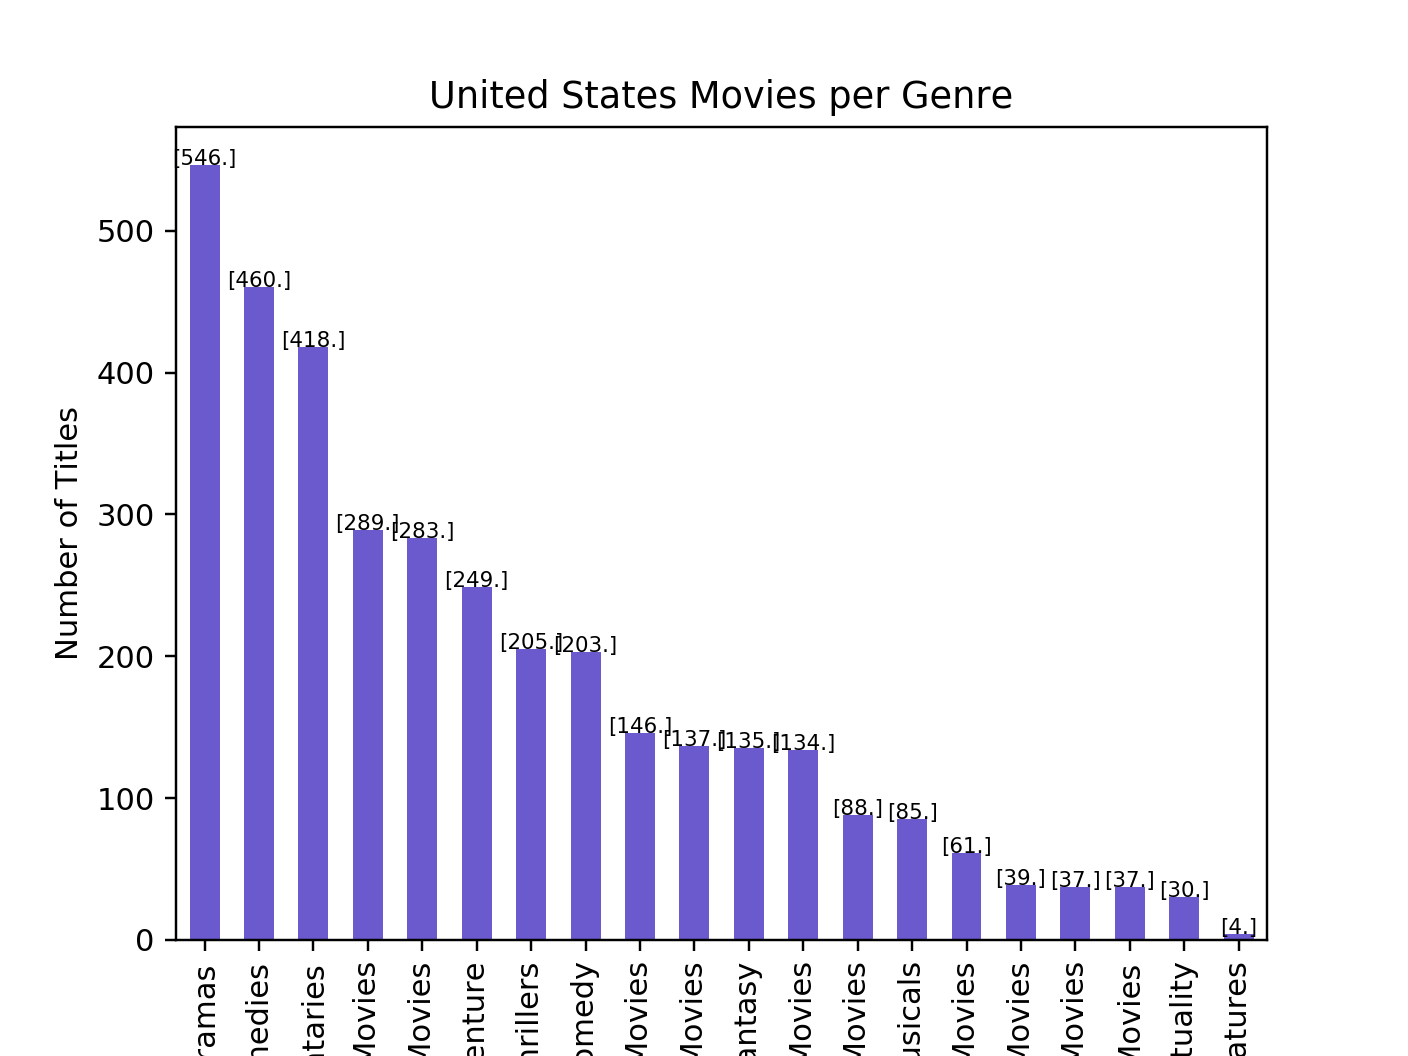

<IPython.core.display.Javascript object>


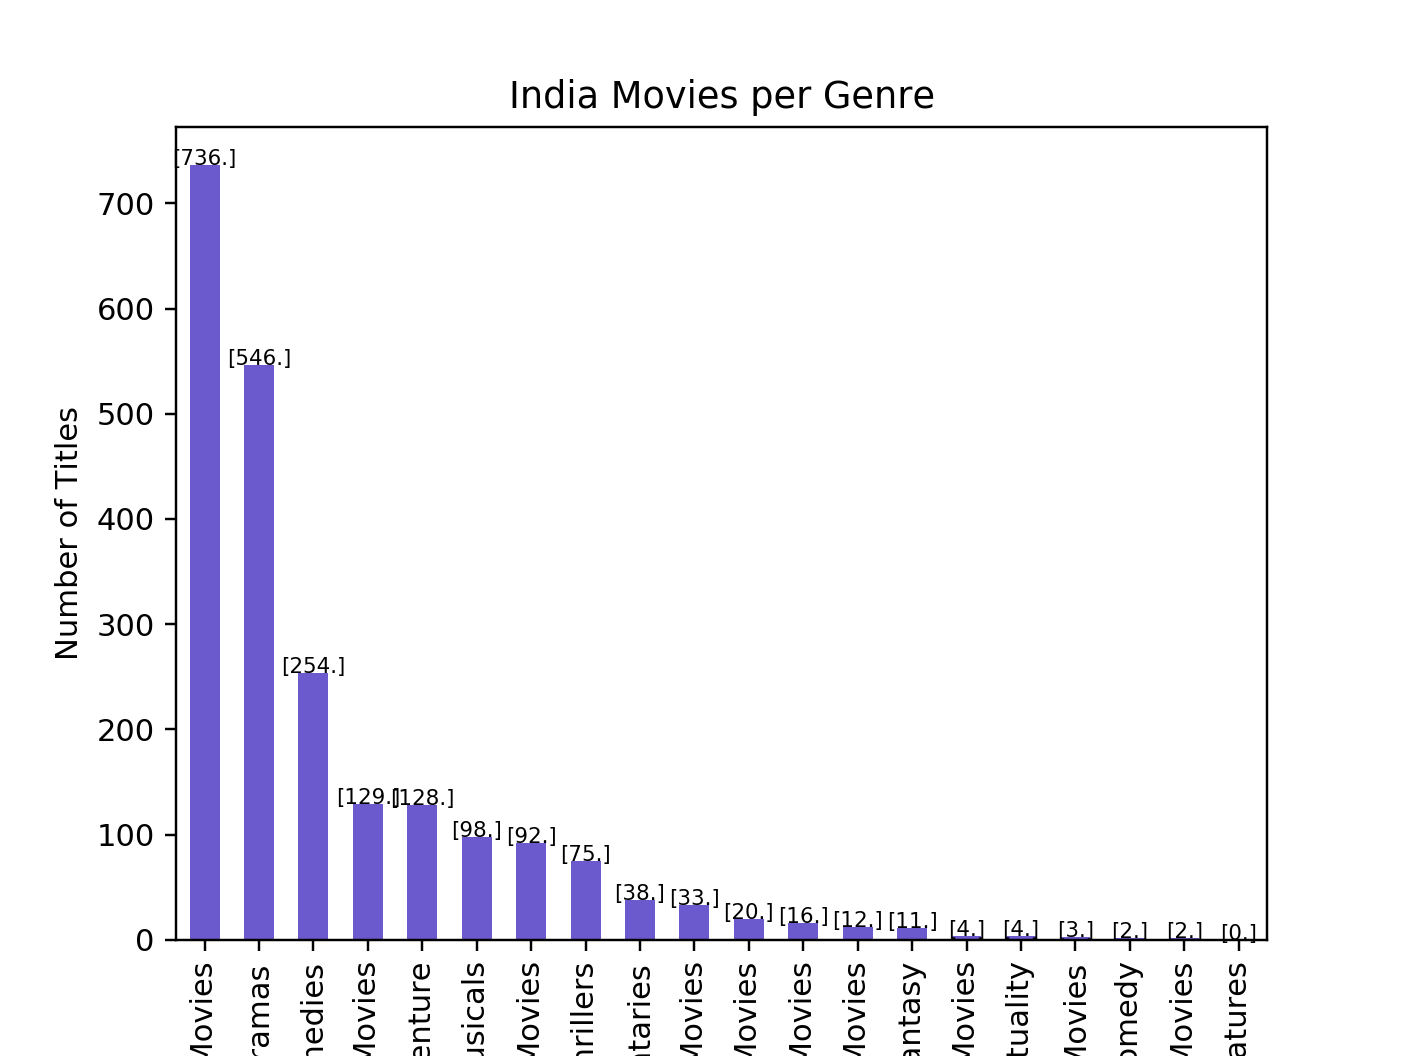

<IPython.core.display.Javascript object>


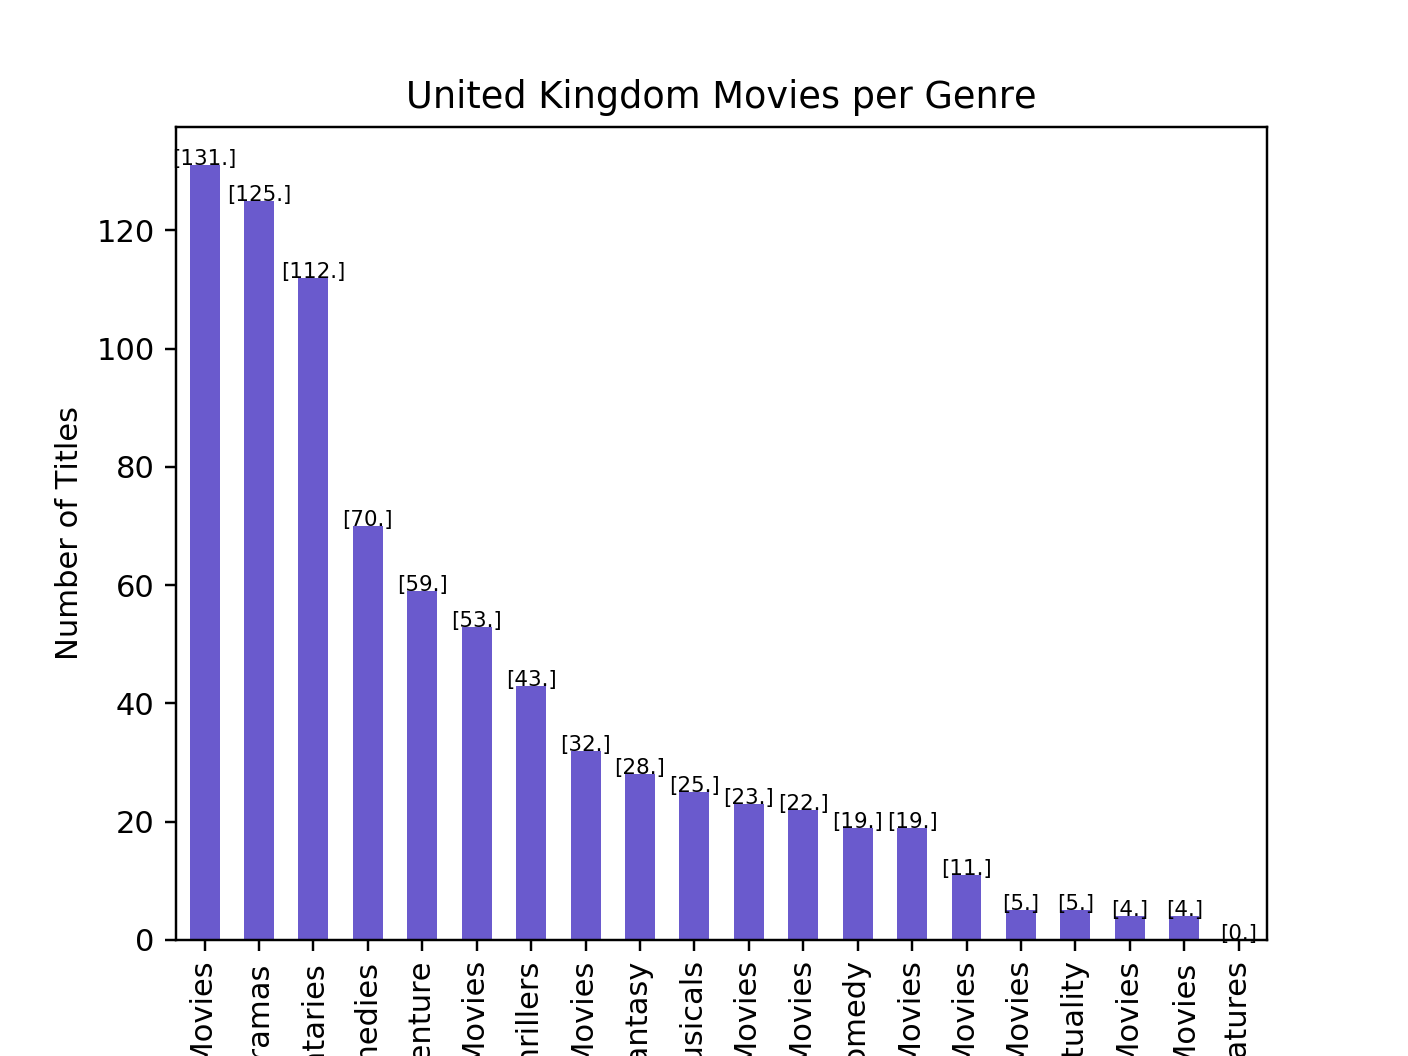

<IPython.core.display.Javascript object>


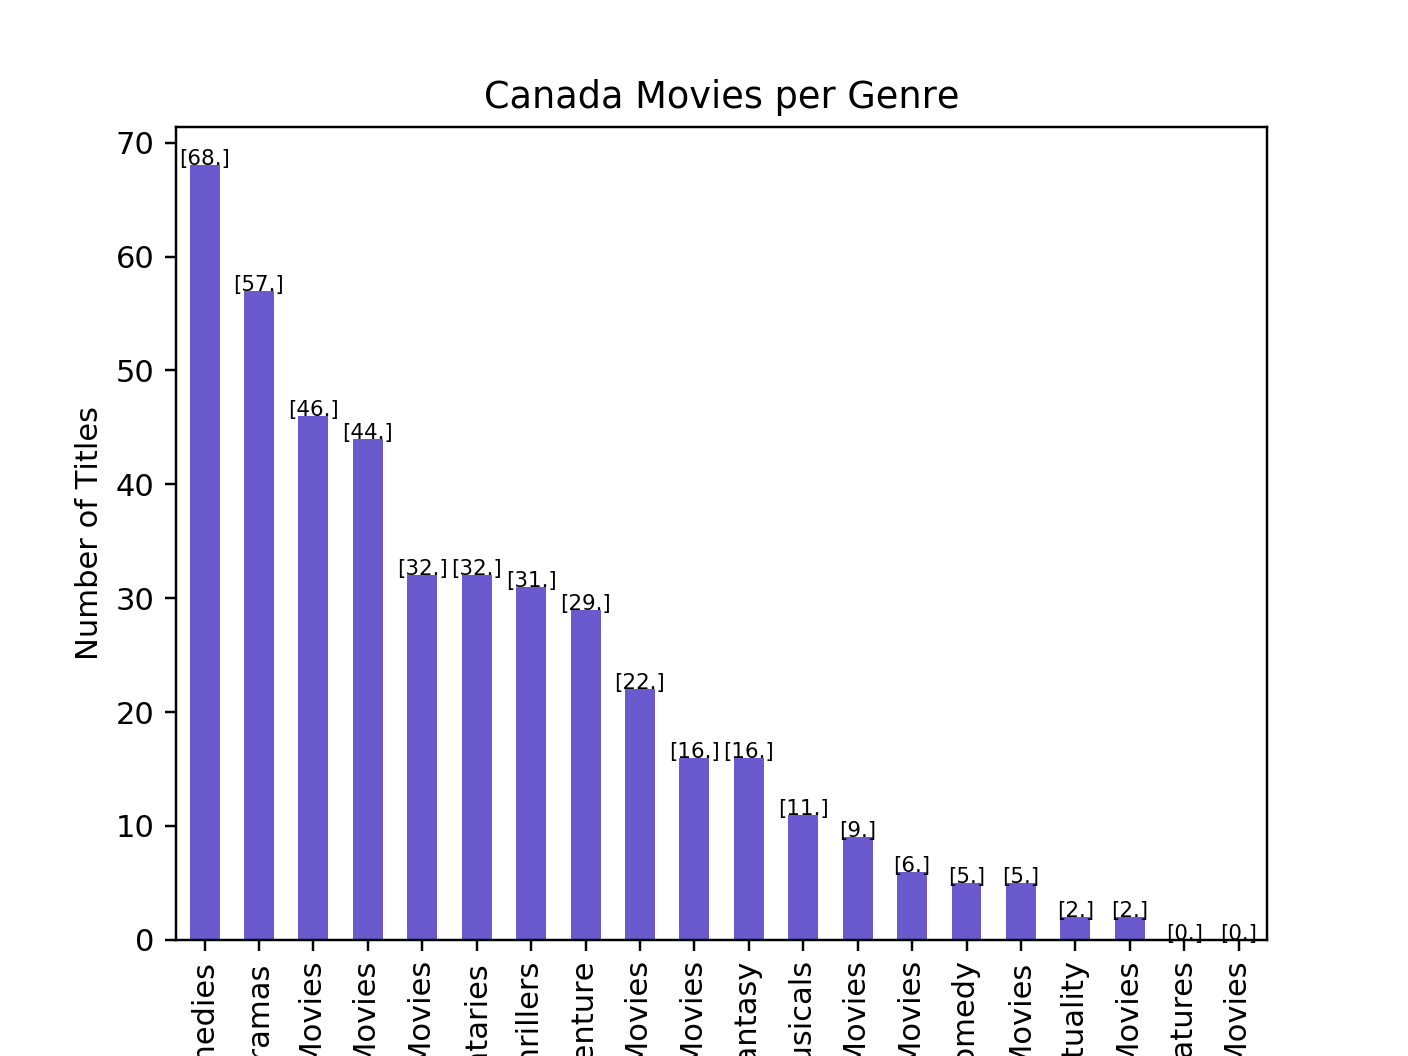

<IPython.core.display.Javascript object>


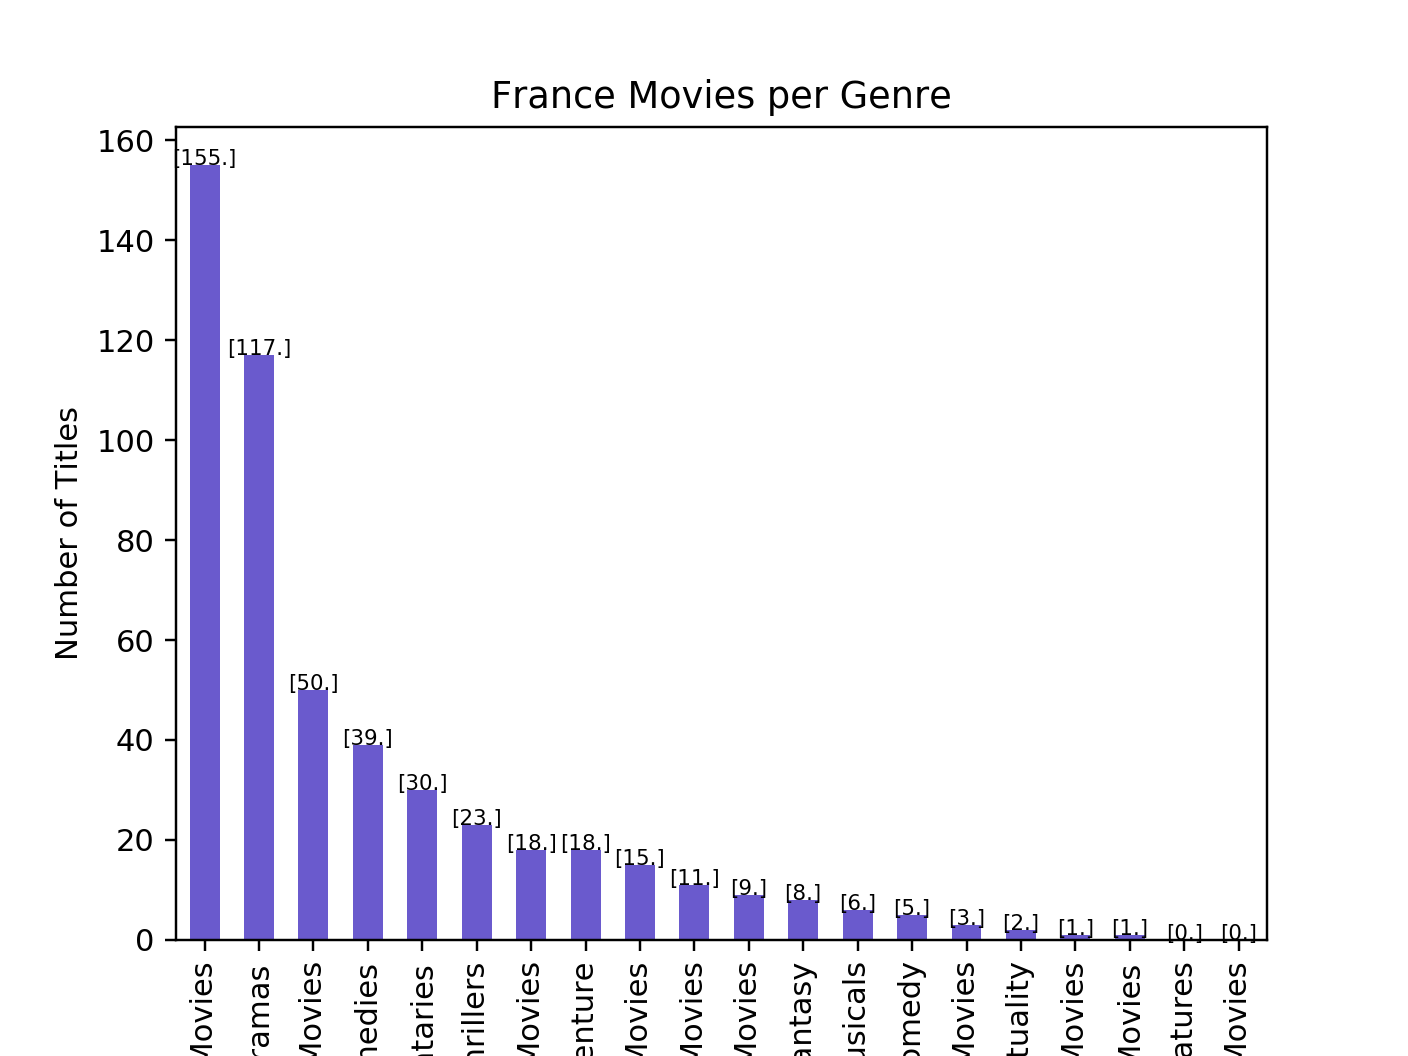

<IPython.core.display.Javascript object>


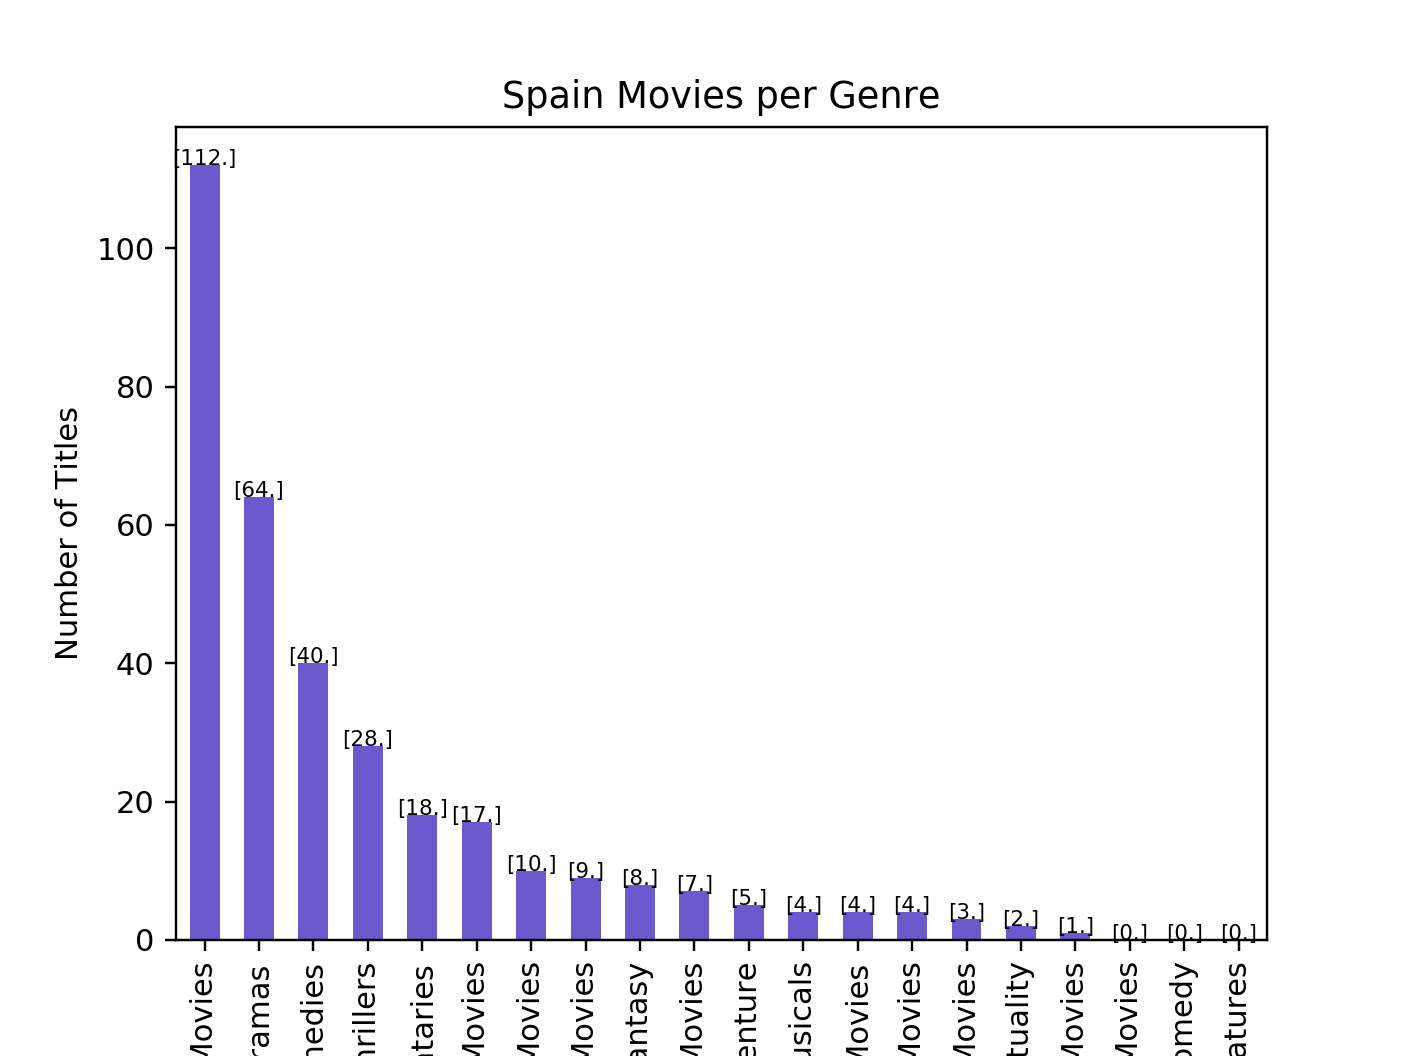

<IPython.core.display.Javascript object>


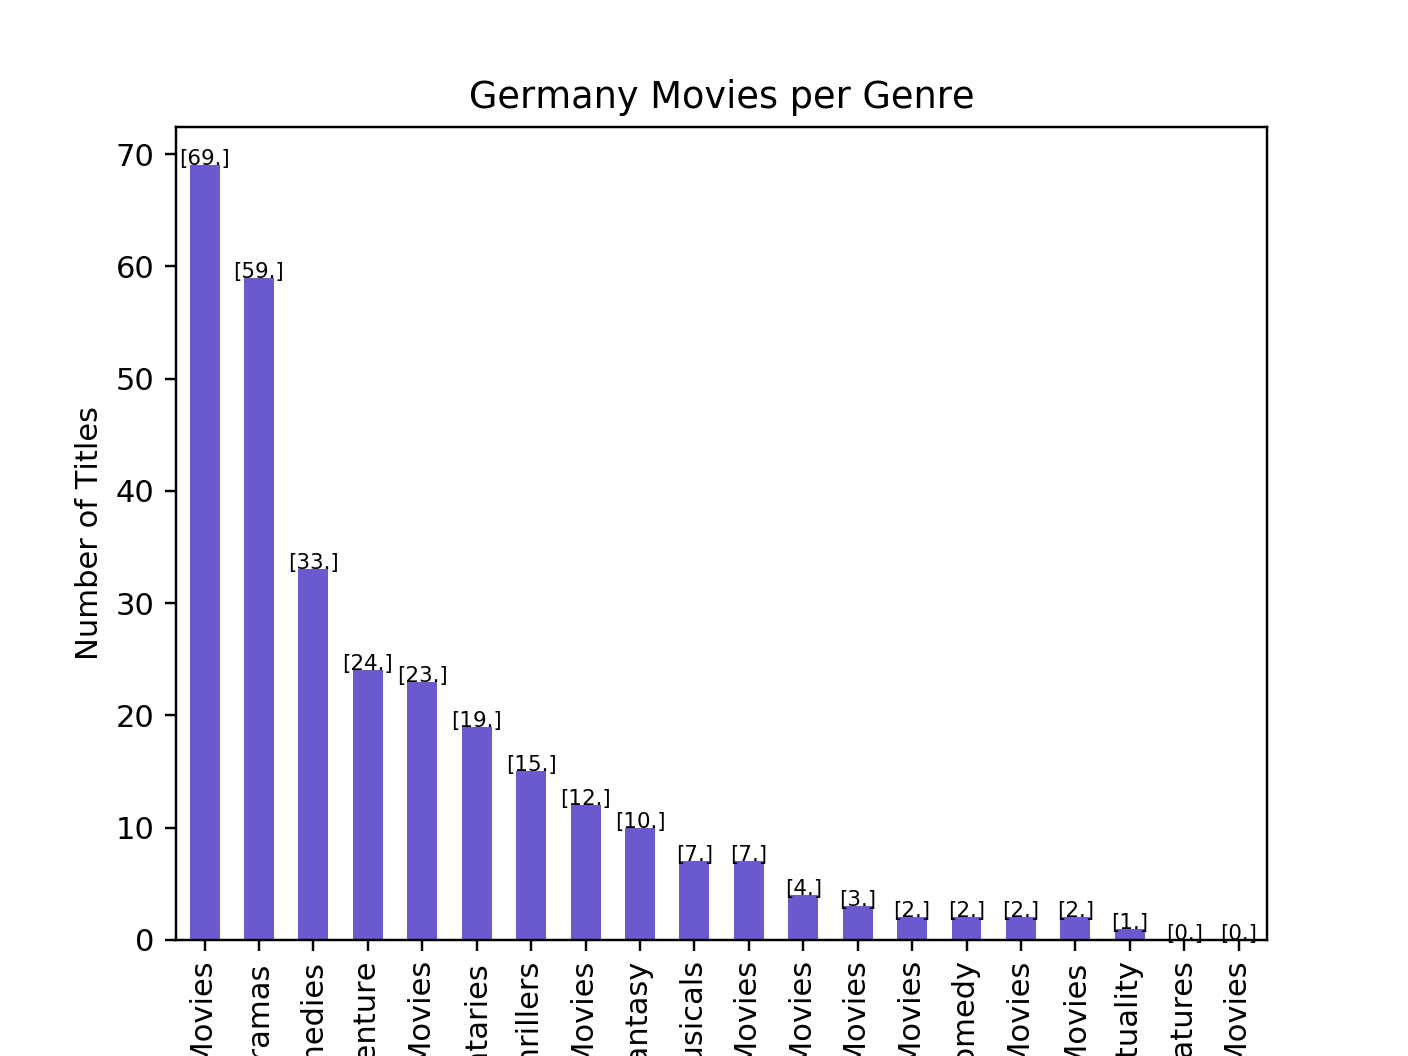

<IPython.core.display.Javascript object>


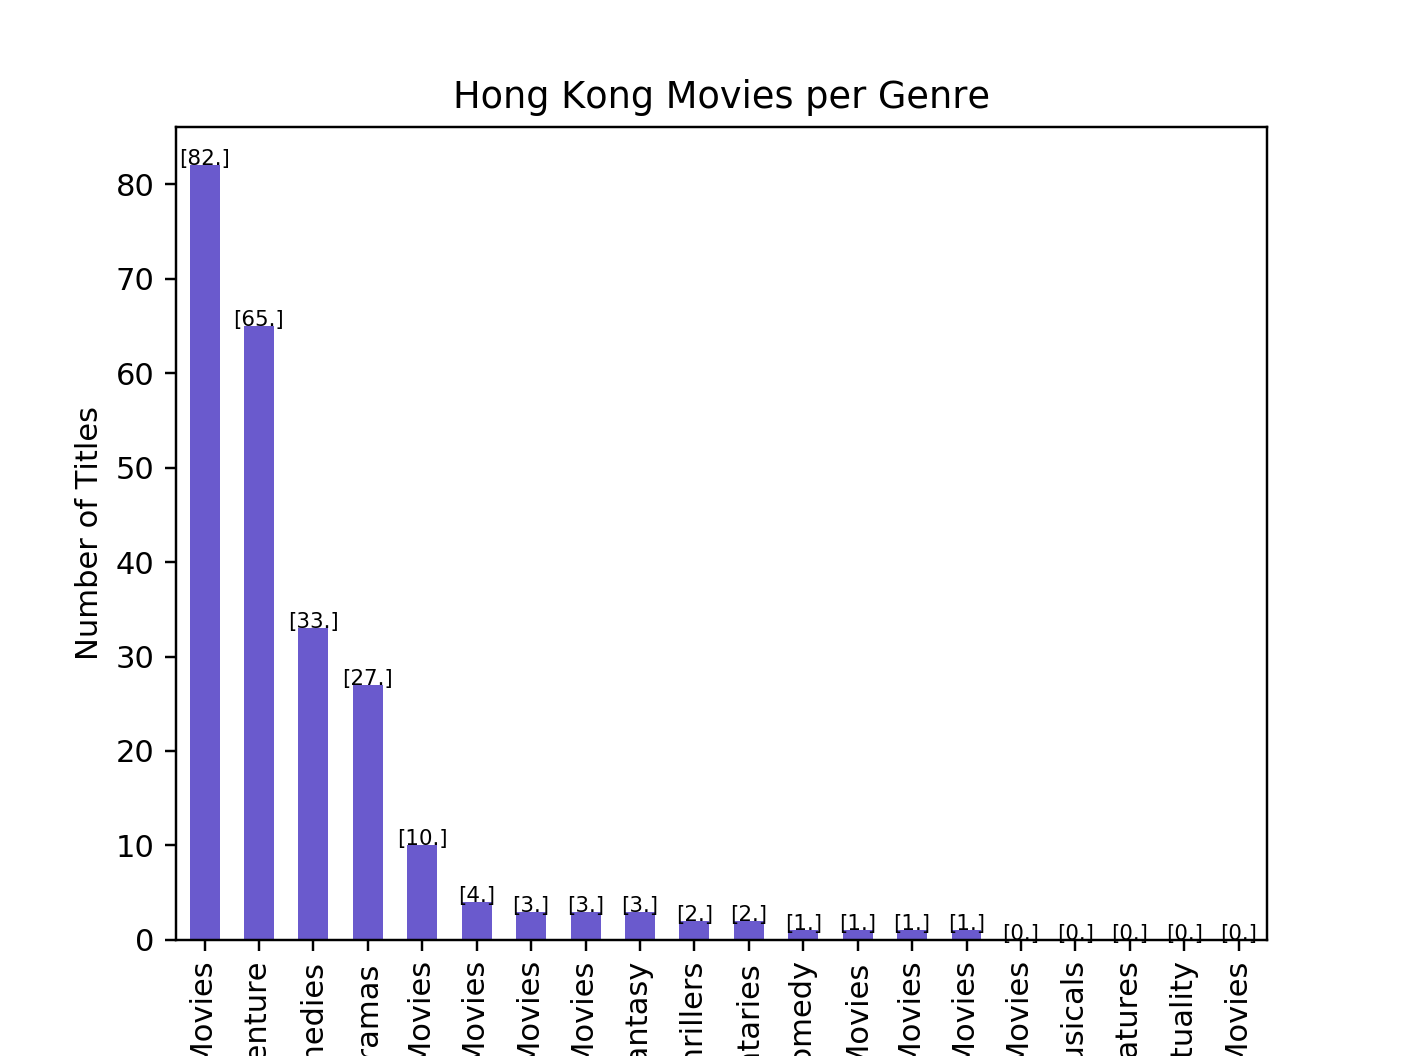

<IPython.core.display.Javascript object>


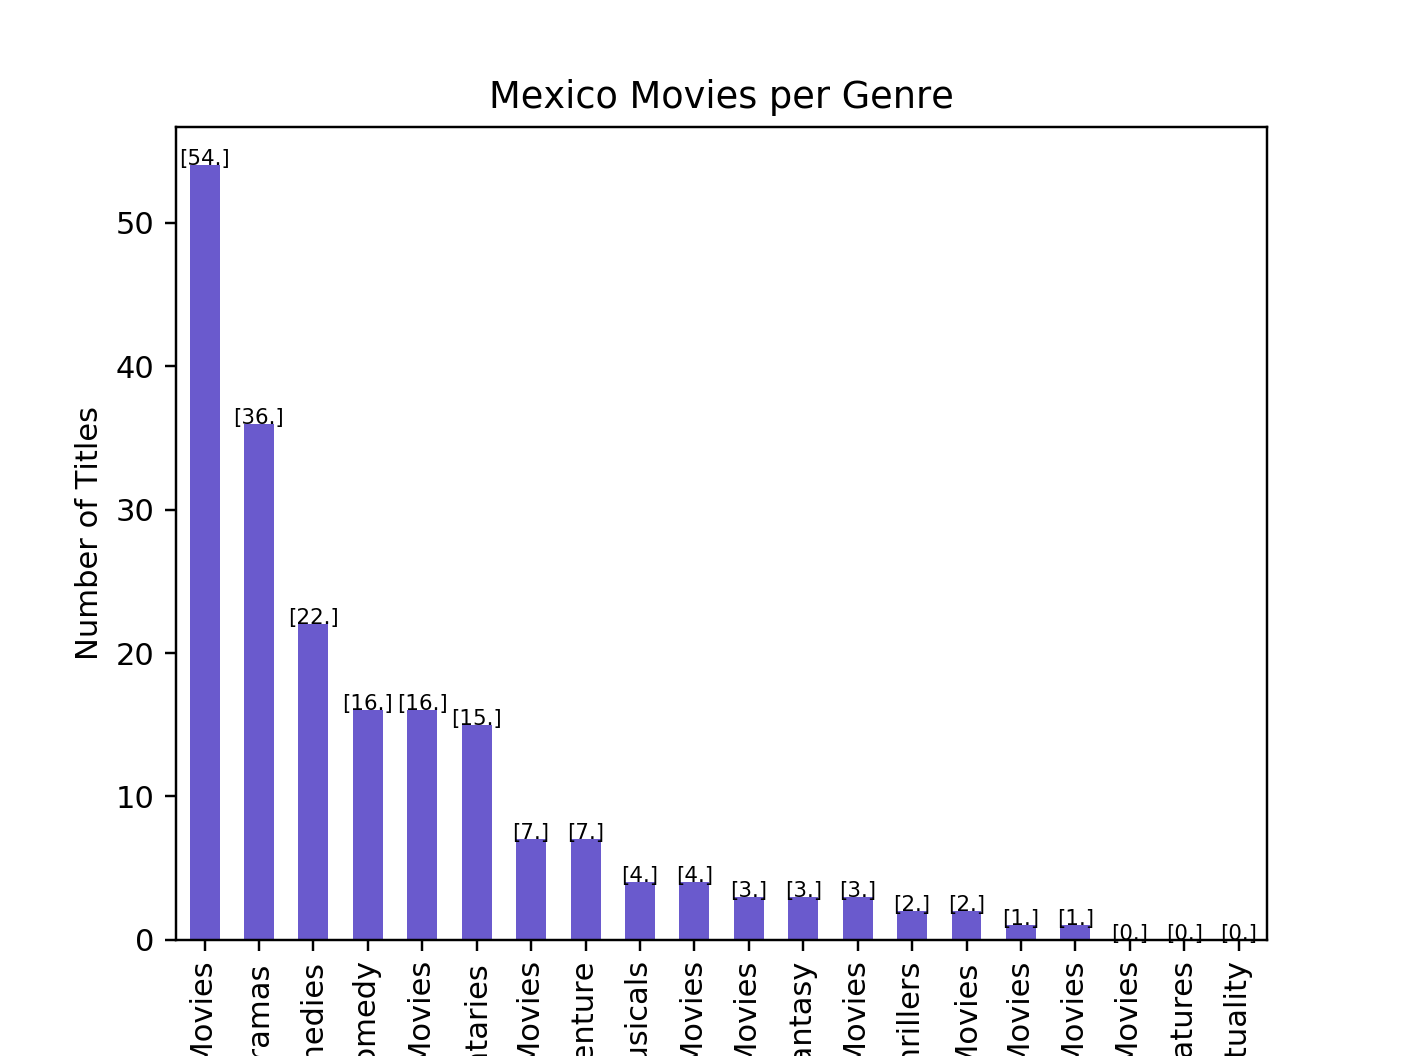

<IPython.core.display.Javascript object>


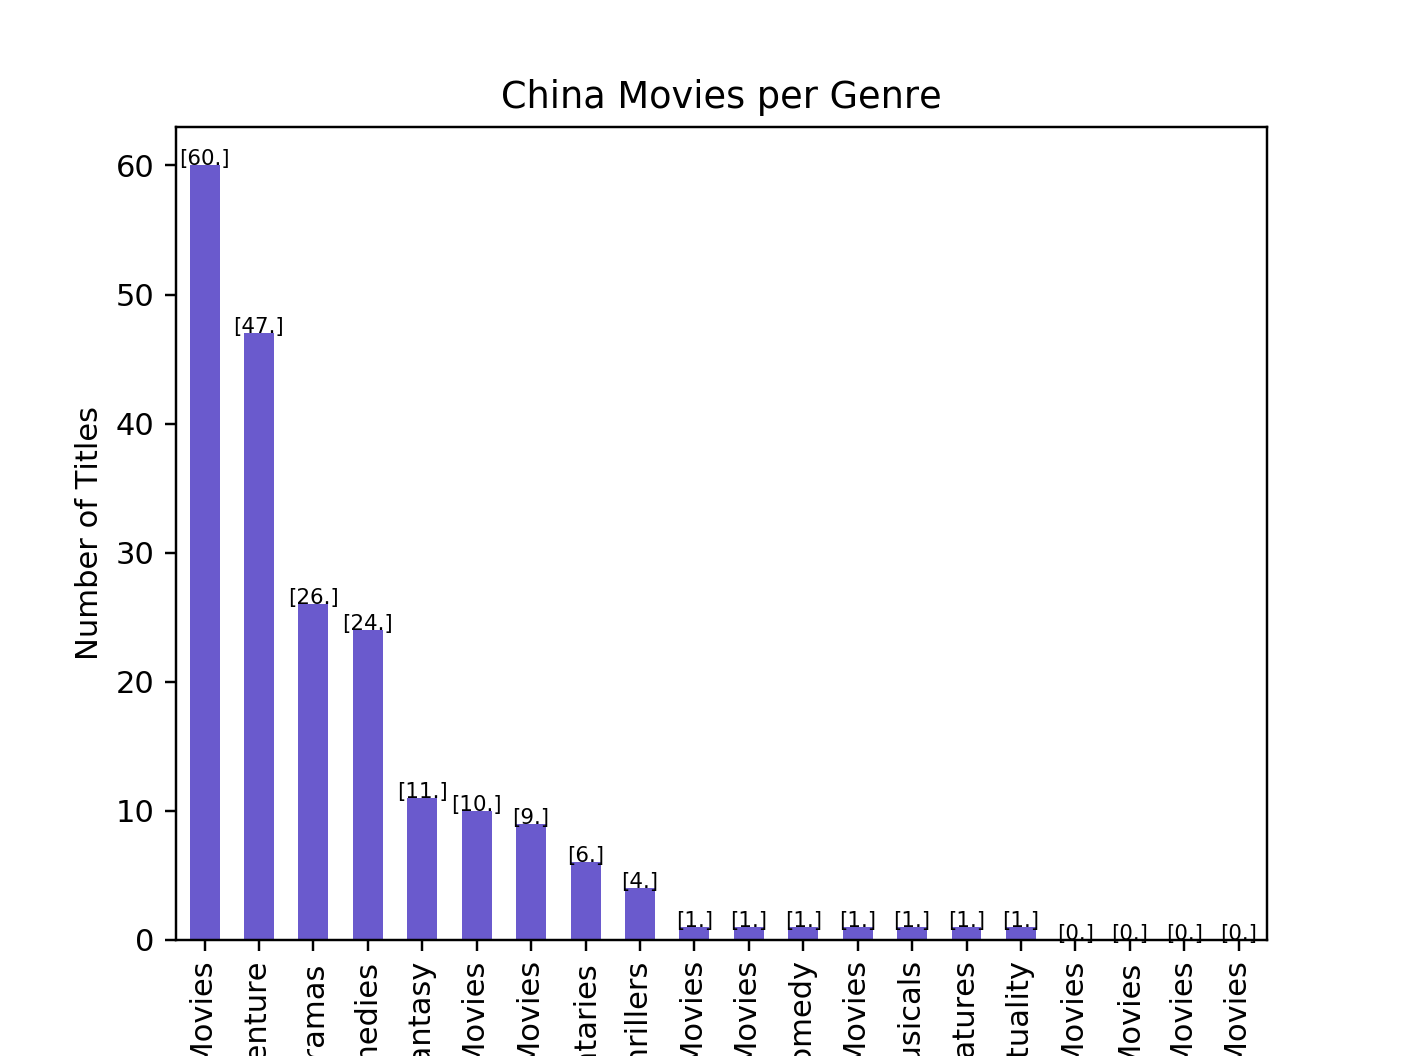

In [15]:
# We plot the top 10 countries with their respective counting movies by genre
for i in range(10):
    select_country = sorted_countries_movie.index[i] # Country
    country_genres = df_movies.loc[df_movies.index == select_country,:] # Data from that country in the matrix
    # Dataframe to sort the values
    df_sorted_genre = pd.DataFrame(country_genres).sort_values(by=select_country, axis=1, ascending=False)
    # We transpose the row data to column data to make easier the ploting 
    df_sorted_genre_T = df_sorted_genre.T
    
    # Bar Plot
    width = 0.55
    ax_bar = df_sorted_genre_T.plot(kind='bar', facecolor='slateblue', width=width, legend=None)
    plt.title(select_country+' Movies per Genre')
    plt.ylabel('Number of Titles')
    plt.xlabel('Genres')
    
    # To enumarate the values in bars
    for i, v in enumerate(df_sorted_genre_T.values):
        ax_bar.text(i, v, str(v), color='k', ha='center', fontsize=7)
        
    # Save figures
    plt.savefig('Movies_Country' + str(i) + '.png')

In [16]:
# Export dataframes of TV Shows data set and TV Shows per genre per country
movies_country.to_csv("Netflix_Movies_Data.csv", index=True, header=True)
df_movies.to_csv('Netflix_Movies_perCountry.csv', index=True, header=True)